# Data

In [1]:
with open('DebrisFlow.txt') as f:
    lines = f.readlines()

In [2]:
print(len(lines))

44


In [3]:
X= []
Y= []
for line in lines:
    a = str.split(line)
    a[0] = float(a[0])
    a[1] = float(a[1])
    X.append(a[0])
    Y.append(a[1])


In [4]:
import pyomo.environ as pyo
model= pyo.ConcreteModel()

Sets and Parameters

In [5]:
I = [i for i in range(len(X))]
model.Iset= pyo.Set(initialize= I)

In [6]:
def X_(model, i):
    return X[i]

model.X= pyo.Param(model.Iset, rule= X_)

In [7]:
def Y_(model, i):
    return Y[i]

model.Y= pyo.Param(model.Iset, rule= Y_)

Variables

In [8]:
model.delta = pyo.Var(model.Iset, domain= pyo.NonNegativeReals)
model.c = pyo.Var(domain=pyo.NonNegativeReals)
model.d = pyo.Var(domain=pyo.Reals)

Constraints

In [9]:
def const_1(model, i):
    return model.Y[i]-(model.c*model.X[i] + model.d)<= model.delta[i]
model.const_1= pyo.Constraint(model.Iset, rule= const_1)

In [10]:
def const_2(model, i):
    return (model.c*model.X[i] + model.d)-model.Y[i]<= model.delta[i]
model.const_2= pyo.Constraint(model.Iset, rule= const_2)

Objective

In [11]:
def obj(model):
    return sum(model.delta[i] for i in model.Iset)
model.obj= pyo.Objective(rule=obj, sense= pyo.minimize)

Solve and Result

In [12]:
opt = pyo.SolverFactory('glpk')
result=opt.solve(model,'glpk')

In [13]:
print(pyo.value(model.obj))

86.82624975816283


In [14]:
c_result= pyo.value(model.c)
d_result= pyo.value(model.d)

In [15]:
print(c_result)
print(d_result)

0.0776222495248608
-2.06102527267168


# Visualization

In [16]:
import matplotlib.pyplot as plt

In [17]:
print(max([abs((X[i]*c_result+d_result)-Y[i]) for i in model.Iset]))

6.500476001791126


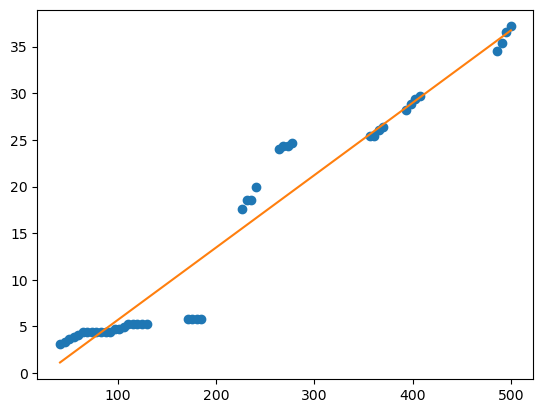

In [18]:
plt.plot(X,Y,'o')
plt.plot(X,[x*c_result+d_result for x in X])
plt.show()